Welcome to a competition powered by AutoDSC for Data Science Challenges! By Prof. Manoel Gadi!

PLEASE DO NOT RENAME THIS FILE!


Simply run this code and start competing today in the competion: 6aQ6IxU7Va

6aQ6IxU7Va details:
 - Description / Descripción: FRAUD MODELLING CHALLENGE - Predict which Credit Card Application is legitimate and which belongs to a fraudster instead.
 - Maximum number of daily attempts / Número máximo de intentos diarios: 10000
 - Creation date / Fecha de creación: 2020-06-10 11:36:52
 - Starting date / Fecha de inicio: 2021-05-12 12:00:00
 - Ending date / Fecha de fin: 2021-05-30 23:59:00
 - Minimum time between prediction submissions / Tiempo mínimo entre envíos de predicciones: 30

Of couse, to win the competition you should improve the starting model! So let's get to work!


In [138]:
print ("IMPORTING LIBRARIES...")
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
#import pandas_profiling

print ("LOADING DATASETS...")
try: # reading train csv from local file
    df_train = pd.read_csv("mfalonso__6aQ6IxU7Va__train.csv")
    df_train.head()
except: # reading train csv from the internet if it is the first time
    import urllib
    csv_train = urllib.request.urlopen("http://manoelutad.pythonanywhere.com/static/uploads/mfalonso__6aQ6IxU7Va__train.csv")
    csv_train_content = csv_train.read()
    with open("mfalonso__6aQ6IxU7Va__train.csv", 'wb') as f:
            f.write(csv_train_content)
    df_train = pd.read_csv("mfalonso__6aQ6IxU7Va__train.csv")

    
try: # reading test csv from local file
    df_test = pd.read_csv("mfalonso__6aQ6IxU7Va__test.csv")
    df_test.head()
except: # reading test csv from the internet if it is the first time
    import urllib
    csv_test = urllib.request.urlopen("http://manoelutad.pythonanywhere.com/static/uploads/mfalonso__6aQ6IxU7Va__test.csv")
    csv_test_content = csv_test.read()
    with open("mfalonso__6aQ6IxU7Va__test.csv", 'wb') as f:
            f.write(csv_test_content)
    df_test = pd.read_csv("mfalonso__6aQ6IxU7Va__test.csv")


IMPORTING LIBRARIES...
LOADING DATASETS...


In [139]:
#report = pandas_profiling.ProfileReport(df_train)
#report.to_file("fraud_challenge_profiling.html")

In [140]:
df_test.isna().any()[0:50]

Unnamed: 0    False
id            False
ib_var_1      False
ib_var_2      False
ib_var_3      False
ib_var_4      False
ib_var_5      False
ib_var_6      False
ib_var_7      False
ib_var_8      False
ib_var_9      False
ib_var_10     False
ib_var_11     False
ib_var_12     False
ib_var_13     False
ib_var_14     False
ib_var_15      True
ib_var_16      True
ib_var_17      True
ib_var_18      True
ib_var_19      True
ib_var_20      True
ib_var_21      True
icn_var_22     True
icn_var_23    False
icn_var_24     True
ico_var_25    False
ico_var_26     True
ico_var_27    False
ico_var_28    False
ico_var_29    False
ico_var_30    False
ico_var_31    False
ico_var_32    False
ico_var_33     True
ico_var_34    False
ico_var_35    False
ico_var_36    False
ico_var_37     True
ico_var_38    False
ico_var_39    False
ico_var_40    False
ico_var_41    False
ico_var_42    False
ico_var_43    False
ico_var_44    False
ico_var_45    False
ico_var_46    False
ico_var_47    False
ico_var_48    False


<AxesSubplot:>

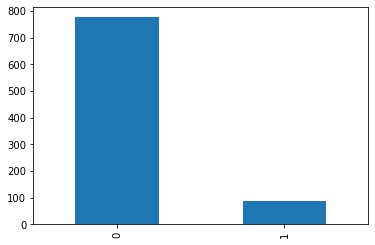

In [141]:
df_train["ob_target"].value_counts().plot(kind="bar")

In [142]:
count_class_0, count_class_1 = df_train.ob_target.value_counts()

# Divide by class
df_class_0 = df_train.loc[df_train['ob_target'] == 0]
df_class_1 = df_train.loc[df_train['ob_target'] == 1]

In [143]:
# Try undersampling first
df_class_0_under = df_class_0.sample(count_class_1)
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)

df_train_under.ob_target.value_counts()

1    88
0    88
Name: ob_target, dtype: int64

<AxesSubplot:>

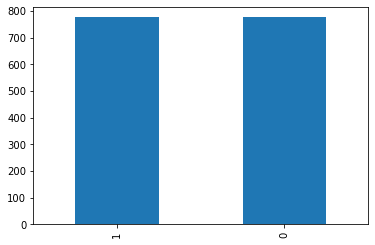

In [341]:
# Try oversampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

df_train_over.ob_target.value_counts().plot(kind='bar')

In [412]:
print ("STEP 1: DOING MY TRANSFORMATIONS...")
df_train = df_train_over
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

#categorical data
categorical_cols = ['icn_var_22', 'icn_var_23', 'icn_var_24'] 
drop_cols = ['ib_var_12']

#df_train = pd.get_dummies(df_train, columns = categorical_cols)
#df_test = pd.get_dummies(df_test, columns = categorical_cols)

#df_train = df_train.drop(drop_cols, axis=1)
#df_test = df_test.drop(drop_cols, axis=1)

STEP 1: DOING MY TRANSFORMATIONS...


In [415]:
print ("STEP 2: SELECTING CHARACTERISTICS TO ENTER INTO THE MODEL...")
def get_specific_columns(df, data_types, to_ignore = list(), ignore_target = False):
    columns = df.select_dtypes(include=data_types).columns
    if ignore_target:
        columns = filter(lambda x: x not in to_ignore, list(columns))
    return list(columns)

#output_var = df_train.columns[-1]
output_var = "ob_target"
in_model = get_specific_columns(df_train, ["float64", "int64"], [output_var], ignore_target = True)

STEP 2: SELECTING CHARACTERISTICS TO ENTER INTO THE MODEL...


In [416]:
drop_cols = ['id', 'Unnamed: 0']
print ("STEP 3: DEVELOPING THE MODEL...")
X_train = df_train[in_model].drop(drop_cols, axis=1)
y_train = df_train[output_var]
X_test = df_test[in_model].drop(drop_cols, axis=1)

STEP 3: DEVELOPING THE MODEL...


## Feature Selection

In [13]:
rfc = RandomForestClassifier(bootstrap=False, max_depth=23,
                                        max_features='sqrt',
                                        min_samples_split=3, n_estimators=716,
                                        random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=23, max_features='sqrt',
                       min_samples_split=3, n_estimators=716, random_state=1)

In [14]:
feature_imp = pd.Series(rfc.feature_importances_, index=X_train.columns).nlargest(70)
selected = list(feature_imp.keys())

In [15]:
feature_imp

if_var_68     0.056493
if_var_79     0.047604
if_var_65     0.043153
Unnamed: 0    0.041434
if_var_78     0.040999
                ...   
ib_var_20     0.004382
ib_var_14     0.004377
ico_var_50    0.004365
ib_var_13     0.004242
icn_var_23    0.003940
Length: 70, dtype: float64

In [16]:
#X_train = df_train[selected]
#X_test = df_test[selected]

## Filter based univariate selection

In [417]:
#import libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

#Fit the model
bestfeatures = SelectKBest(score_func=chi2, k=55)
fit = bestfeatures.fit(X_train, y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

<AxesSubplot:>

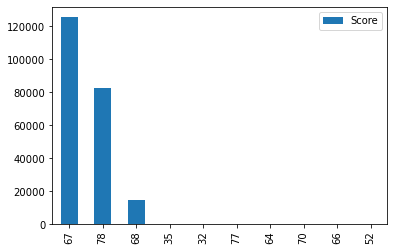

In [418]:
#concatenate the two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

#print 10 best features
featureScores.nlargest(10,'Score').plot(kind='bar')

In [419]:
selected = list(featureScores.nlargest(55, 'Score').loc[:,"Specs"])

In [420]:
X_train = df_train[selected]
X_test = df_test[selected]

## SelectFromModel

In [293]:
#import libraries
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

#Fit the model
lcv = LassoCV().fit(X_train, y_train)

In [294]:
#Selected features
importance = np.abs(lcv.coef_)
idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.01
idx_features = (-importance).argsort()[:60]
selected = np.array(X_train.columns)[idx_features]

In [295]:
#X_train = df_train[selected]
#X_test = df_test[selected]

## Train and Predict

In [241]:
## Random Search
RF_pipe = Pipeline(steps = [ ('RF', RandomForestClassifier()) ])

params = {
    'RF__bootstrap':         [True, False],
    'RF__max_depth':         randint(0,100),
    'RF__max_features':      ['sqrt', 'log2'],
    'RF__min_samples_leaf':  randint(0,30),
    'RF__min_samples_split': randint(0,30),
    'RF__n_estimators':      randint(0,1500),
    'RF__random_state':      [42,2,9,7,88,54,11,23,18,32,50,44,99,125,1,3,15]
}

estimator = RandomizedSearchCV(RF_pipe, 
                               params, 
                               cv=5, 
                               n_iter=20, 
                               n_jobs=-1, 
                               scoring = 'roc_auc')

estimator.fit(X_train, y_train)
print("Randomized Search Finished")

Randomized Search Finished


In [242]:
estimator.best_estimator_

Pipeline(steps=[('RF',
                 RandomForestClassifier(bootstrap=False, max_depth=55,
                                        max_features='sqrt', min_samples_leaf=3,
                                        min_samples_split=8, n_estimators=606,
                                        random_state=99))])

In [441]:
#train and predict
clf = RandomForestClassifier(bootstrap=False, max_depth=35,
                                        max_features='sqrt',
                                        min_samples_split=7, n_estimators=710,
                                        random_state=1)
fitted_model = clf.fit(X_train, y_train)


pred_train = fitted_model.predict_proba(X_train)[:,1]
pred_test  = fitted_model.predict_proba(X_test)[:,1]

In [442]:
print ("STEP 4: ASSESSING THE MODEL...")
# CALCULATING GINI PERFORMANCE ON DEVELOPMENT SAMPLE
from sklearn.metrics import roc_auc_score
gini_score = 2*roc_auc_score(y_train, pred_train)-1
print ("GINI DEVELOPMENT=", gini_score)


STEP 4: ASSESSING THE MODEL...
GINI DEVELOPMENT= 1.0


WHAT IS GINI?
* watch this video for reference: https://youtu.be/MiBUBVUC8kE


In [444]:
print ("STEP 5: SUBMITTING THE RESULTS... DO NOT CHANGE THIS PART!")
import requests
from requests.auth import HTTPBasicAuth
df_test['pred'] = pred_test
df_test['id'] = df_test.iloc[:,0]
df_test_tosend = df_test[['id','pred']]

filename = "df_test_tosend.csv"
df_test_tosend.to_csv(filename, sep=',')
url = 'http://manoelutad.pythonanywhere.com/uploadpredictions/6aQ6IxU7Va'
files = {'file': (filename, open(filename, 'rb')),
         'ipynbcode': ('6aQ6IxU7Va.ipynb', open('6aQ6IxU7Va.ipynb', 'rb'))}


#rsub = requests.post(url, files=files)
rsub = requests.post(url, files=files, auth=HTTPBasicAuth("danielalbertomr", "sha256$VmhuIeSU$3e783811cf08de9b295b21d25c7283196b2e62c507db822dc7ee2fe7de4ea93d"))
resp_str = str(rsub.text)
print ("RESULT SUBMISSION: ", resp_str)

STEP 5: SUBMITTING THE RESULTS... DO NOT CHANGE THIS PART!
RESULT SUBMISSION:  Competition / competición: 6aQ6IxU7Va - gini = 0.5419285298385383


In [445]:
#df_test_tosend.to_csv("best_prediction_11.csv")